# Table manipulation class

In [1]:
import numpy as np

from astropy.table import Table, hstack, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
import astropy.coordinates as coord
from astropy.cosmology import Planck15

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from pymoc import MOC
import healpy as hp
import pyvo as vo
import time as time

from astroquery.vizier import Vizier

In [2]:
t = Table.read('./data/obs_iac80_int_oct2019_todo_v1.txt', format='ascii')

In [3]:
t

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio
str33,str12,str13,str12,float64,str9,str5
2019qfb,20:45:12.035,-12:00:39.94,ZTF19abxekxi,0.1423,11oct2019,IAC80
2019rsi,00:42:23.531,+41:11:52.18,ZTF19acbzgog,--,11oct2019,IAC80
2019sik,22:20:12.225,+17:36:40.53,ZTF19accobqx,--,11oct2019,IAC80
2019sft,00:15:36.624,+20:01:30.20,ZTF19acdpmzy,--,11oct2019,IAC80
2019skb,21:33:52.051,+33:53:39.51,ZTF19acedfpz,--,11oct2019,IAC80
2019sdq,01:33:25.091,+23:45:13.20,ZTF19acdgafe,--,11oct2019,IAC80
2019sdv,01:57:42.150,+13:23:25.44,ZTF19acdgyxw,--,11oct2019,IAC80
2019sjz,03:10:30.471,+05:13:42.80,ZTF19acdigzw,--,11oct2019,IAC80
2019ska,03:20:08.145,-12:13:24.92,ZTF19aceetrx,--,11oct2019,IAC80


In [4]:
c = SkyCoord(ra=t['ra_TNS'], dec=t['dec_TNS'], unit=(u.hour,u.deg))

In [5]:
t['ra'] = c.ra.deg
t['dec'] = c.dec.deg

In [6]:
t

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio,ra,dec
str33,str12,str13,str12,float64,str9,str5,float64,float64
2019qfb,20:45:12.035,-12:00:39.94,ZTF19abxekxi,0.1423,11oct2019,IAC80,311.30014583333326,-12.011094444444444
2019rsi,00:42:23.531,+41:11:52.18,ZTF19acbzgog,--,11oct2019,IAC80,10.59804583333333,41.197827777777775
2019sik,22:20:12.225,+17:36:40.53,ZTF19accobqx,--,11oct2019,IAC80,335.0509374999999,17.611258333333335
2019sft,00:15:36.624,+20:01:30.20,ZTF19acdpmzy,--,11oct2019,IAC80,3.902599999999999,20.025055555555554
2019skb,21:33:52.051,+33:53:39.51,ZTF19acedfpz,--,11oct2019,IAC80,323.4668791666666,33.894308333333335
2019sdq,01:33:25.091,+23:45:13.20,ZTF19acdgafe,--,11oct2019,IAC80,23.354545833333333,23.753666666666668
2019sdv,01:57:42.150,+13:23:25.44,ZTF19acdgyxw,--,11oct2019,IAC80,29.425624999999997,13.3904
2019sjz,03:10:30.471,+05:13:42.80,ZTF19acdigzw,--,11oct2019,IAC80,47.62696249999999,5.228555555555555
2019ska,03:20:08.145,-12:13:24.92,ZTF19aceetrx,--,11oct2019,IAC80,50.0339375,-12.223588888888889


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


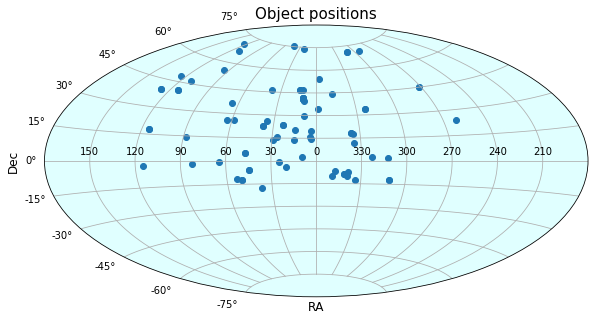

In [7]:
def plot_mwd(RA,Dec,org=0,title='Object positions', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(Dec))  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
plot_mwd(c.ra.degree, c.dec.degree, projection='aitoff')

In [8]:


radius = 100*u.arcsec.to('deg')

def panstarrs_query(ra_deg, dec_deg, rad_deg, maxmag=20,
                    maxsources=10000):
    """
    Query PanSTARRS @ VizieR using astroquery.vizier
    :param ra_deg: RA in degrees
    :param dec_deg: Declination in degrees
    :param rad_deg: field radius in degrees
    :param maxmag: upper limit G magnitude (optional)
    :param maxsources: maximum number of sources
    :return: astropy.table object
    """
    vquery = Vizier(columns=['objID', 'RAJ2000', 'DEJ2000',
                             'e_RAJ2000', 'e_DEJ2000',
                             'gmag', 'e_gmag',
                             'rmag', 'e_rmag',
                             'imag', 'e_imag',
                             'zmag', 'e_zmag',
                             'ymag', 'e_ymag'],
                    column_filters={"gmag":
                                    ("<%f" % maxmag)},
                    row_limit=maxsources)

    field = coord.SkyCoord(ra=ra_deg, dec=dec_deg,
                           unit=(u.deg, u.deg),
                           frame='icrs')
    return vquery.query_region(field,
                               width=("%fd" % rad_deg),
                               catalog="II/349/ps1")[0]


# Example query
print(panstarrs_query(12.345, 67.89, radius))

      objID           RAJ2000       DEJ2000    ...  e_zmag   ymag   e_ymag
                        deg           deg      ...   mag     mag     mag  
------------------ ------------- ------------- ... ------- ------- -------
189460123556221910  12.355628580  67.884273200 ...  0.0021 14.0190  0.0016
189470123537790102  12.353740850  67.891079330 ...  0.0050 16.2947  0.0062
189470123533348447  12.353306870  67.898032070 ...  0.0024 15.2651  0.0057


In [9]:
ps = panstarrs_query(t['ra'], t['dec'], 5*u.arcsec.to('deg'))
ps

_q,objID,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,ymag,e_ymag
,,deg,deg,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,int64,float64,float64,float64,float64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32
3,129133350506713973,335.050689510,17.611207660,0.0096,0.0124,18.9633,0.0258,18.6510,0.0747,18.5268,0.0613,18.5681,0.0484,18.6683,0.0458
5,148673234672164486,323.467225390,33.894904700,0.0058,0.0040,19.2410,0.0174,18.1266,0.0454,17.8360,0.0279,17.4982,0.0214,17.2831,0.0283
7,124060294254898761,29.425563690,13.390134650,0.0160,0.0160,19.4905,0.0147,--,--,--,--,19.1002,0.0275,--,--
13,161952713405931648,271.340465520,44.958984740,0.1413,0.3358,17.9668,0.0646,--,--,16.7663,0.0026,--,--,17.3568,0.0131
13,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055
17,157520106847333510,10.684694730,41.269063770,0.1126,0.0542,13.2210,0.0750,12.6090,--,11.6230,--,11.0780,--,10.7670,--
28,161952713405931648,271.340465520,44.958984740,0.1413,0.3358,17.9668,0.0646,--,--,16.7663,0.0026,--,--,17.3568,0.0131
28,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055


In [10]:
ps_c = SkyCoord(ps['RAJ2000'], ps['DEJ2000'])

In [11]:
radius

0.027777777777777776

In [12]:
idx_ps, idx_t, d2d, _ = c.search_around_sky(ps_c, radius*u.deg)

In [13]:
len(ps_c), len(idx_ps), len(c), len(idx_t)

(18, 24, 83, 24)

In [14]:
#sort by separation
sort_idx = np.argsort(d2d)
idx_t = idx_t[sort_idx]
idx_ps = idx_ps[sort_idx]

In [15]:
idx_t

array([12, 27, 12, 27, 74, 16, 65, 64,  2,  6, 61, 78, 63, 12, 27, 12, 27,
       55,  4, 30, 30,  4, 72, 67])

In [16]:
idx_ps

array([ 7,  7,  4,  4, 16,  5, 13, 12,  0,  2, 10, 17, 11,  6,  6,  3,  3,
        9,  8,  8,  1,  1, 15, 14])

In [17]:
t[idx_t]

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio,ra,dec
str33,str12,str13,str12,float64,str9,str5,float64,float64
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,12oct2019,IAC80,271.33983749999993,44.95899722222222
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,18oct2019,INT,271.33983749999993,44.95899722222222
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,12oct2019,IAC80,271.33983749999993,44.95899722222222
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,18oct2019,INT,271.33983749999993,44.95899722222222
2019sqp,02:18:46.983,+25:44:17.74,ZTF19acfsvfo,--,18oct2019,IAC80,34.695762499999994,25.73826111111111
M31_centro,00:42:44.3,+41:16:09,--,--,12oct2019,IAC80,10.684583333333332,41.26916666666666
2019spn,19:26:39.268,+70:40:22.12,ZTF19acewlxo,--,18oct2019,IAC80,291.66361666666666,70.67281111111112
2019soy,17:24:30.746,+23:49:45.54,ZTF19acewhhp,--,18oct2019,IAC80,261.1281083333333,23.829316666666667
2019sik,22:20:12.225,+17:36:40.53,ZTF19accobqx,--,11oct2019,IAC80,335.0509374999999,17.611258333333335


In [18]:
ps[idx_ps]

_q,objID,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,ymag,e_ymag
,,deg,deg,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,int64,float64,float64,float64,float64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32
28,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055
28,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055
13,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055
13,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055
75,138880346957386577,34.695757680,25.738316990,0.0038,0.0042,17.3017,0.0149,17.1933,0.0106,16.9728,0.0085,17.1755,0.0071,16.9421,0.0091
17,157520106847333510,10.684694730,41.269063770,0.1126,0.0542,13.2210,0.0750,12.6090,--,11.6230,--,11.0780,--,10.7670,--
66,192802916631108403,291.663100880,70.672941830,0.0063,0.0090,19.5627,0.0215,19.2598,0.0253,18.7726,0.0382,18.5893,0.0214,18.6635,0.0292
65,136592611279485558,261.127920920,23.829157640,0.0073,0.0040,18.6840,0.0403,18.4729,0.0289,17.4889,0.0302,17.6676,0.0190,17.4463,0.0598


In [19]:
matches = hstack([t[idx_t], ps[idx_ps]])

In [20]:
matches['seperation'] = SkyCoord(
    matches['ra']*u.deg, matches['dec']*u.deg
).separation(
    SkyCoord( 
        matches['RAJ2000'], matches['DEJ2000']
    )
).to(u.arcsec)

In [21]:
matches

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio,ra,dec,_q,objID,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,ymag,e_ymag,seperation
,,,,,,,,,,,deg,deg,arcsec,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,arcsec
str33,str12,str13,str12,float64,str9,str5,float64,float64,int32,int64,float64,float64,float64,float64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,12oct2019,IAC80,271.33983749999993,44.95899722222222,28,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055,0.11401627774843998
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,18oct2019,INT,271.33983749999993,44.95899722222222,28,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055,0.11401627774843998
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,12oct2019,IAC80,271.33983749999993,44.95899722222222,13,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055,0.11401627774843998
2019rub,18:05:21.561,+44:57:32.39,ZTF19accedxz,--,18oct2019,INT,271.33983749999993,44.95899722222222,13,161952713398981454,271.339841900,44.959028740,0.0688,0.0132,18.3753,0.1281,17.5507,0.0120,17.2352,0.0135,16.7720,0.0392,16.6300,0.0055,0.11401627774843998
2019sqp,02:18:46.983,+25:44:17.74,ZTF19acfsvfo,--,18oct2019,IAC80,34.695762499999994,25.73826111111111,75,138880346957386577,34.695757680,25.738316990,0.0038,0.0042,17.3017,0.0149,17.1933,0.0106,16.9728,0.0085,17.1755,0.0071,16.9421,0.0091,0.2017703299908817
M31_centro,00:42:44.3,+41:16:09,--,--,12oct2019,IAC80,10.684583333333332,41.26916666666666,17,157520106847333510,10.684694730,41.269063770,0.1126,0.0542,13.2210,0.0750,12.6090,--,11.6230,--,11.0780,--,10.7670,--,0.4775680794195258
2019spn,19:26:39.268,+70:40:22.12,ZTF19acewlxo,--,18oct2019,IAC80,291.66361666666666,70.67281111111112,66,192802916631108403,291.663100880,70.672941830,0.0063,0.0090,19.5627,0.0215,19.2598,0.0253,18.7726,0.0382,18.5893,0.0214,18.6635,0.0292,0.7740229659775367
2019soy,17:24:30.746,+23:49:45.54,ZTF19acewhhp,--,18oct2019,IAC80,261.1281083333333,23.829316666666667,65,136592611279485558,261.127920920,23.829157640,0.0073,0.0040,18.6840,0.0403,18.4729,0.0289,17.4889,0.0302,17.6676,0.0190,17.4463,0.0598,0.8418162180183029


In [22]:
len(np.unique(matches['TNS_ID']))

14

In [23]:
np.sum(~matches['redshift_TNS'].mask)

0

In [24]:
np.sum(~t['redshift_TNS'].mask)

11

(array([7., 1., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([4.70000e-04, 5.76830e-02, 1.14896e-01, 1.72109e-01, 2.29322e-01,
        2.86535e-01, 3.43748e-01, 4.00961e-01, 4.58174e-01, 5.15387e-01,
        5.72600e-01]),
 <a list of 10 Patch objects>)

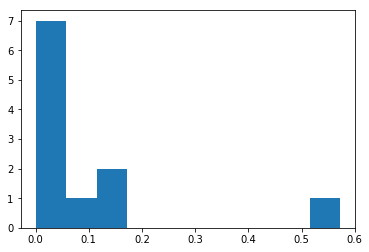

In [25]:
plt.hist(t['redshift_TNS'][~t['redshift_TNS'].mask])

In [26]:
Planck15.luminosity_distance(t['redshift_TNS'][~t['redshift_TNS'].mask])

<Quantity [6.95095918e+02, 4.55109774e+02, 2.08079897e+00, 6.95095918e+02,
           4.45951019e+01, 2.29889339e+02, 3.43502326e+03, 2.01205313e+02,
           2.29889339e+02, 2.20127783e+02, 1.82386457e+02] Mpc>

(array([7., 1., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.08079897e+00, 3.45375045e+02, 6.88669291e+02, 1.03196354e+03,
        1.37525778e+03, 1.71855203e+03, 2.06184628e+03, 2.40514052e+03,
        2.74843477e+03, 3.09172901e+03, 3.43502326e+03]),
 <a list of 10 Patch objects>)

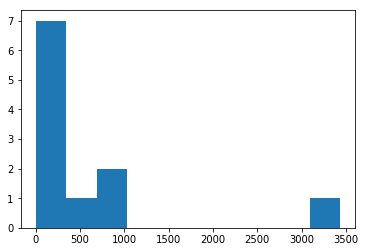

In [27]:
plt.hist(Planck15.luminosity_distance(t['redshift_TNS'][~t['redshift_TNS'].mask]))

## Are any objects in HELP?

In [28]:
help_moc = MOC(filename='./data/help_coverage_MOC.fits')

In [29]:
help_moc

<MOC: [(4, [643, 648, 649, 650, 652, 1027, 1028, 1032, 1086, 1087, 1129, 1130, 1131, 1132, 1134, 1172, 2233, 2884, 2885, 2886, 2911, 2932]), (5, [1517, 1519, 2566, 2567, 2569, 2570, 2571, 2584, 2586, 2587, 2604, 2605, 2606, 2612, 2689, 4103, 4107, 4116, 4117, 4120, 4132, 4136, 4335, 4338, 4341, 4343, 4422, 4453, 4454, 4457, 4458, 4494, 4501, 4502, 4505, 4506, 4507, 4508, 4510, 4511, 4514, 4515, 4532, 4533, 4534, 4540, 4677, 4679, 4692, 4693, 4695, 4696, 4697, 4864, 4865, 4866, 4868, 4869, 5461, 5462, 5463, 5468, 6399, 6486, 6487, 6489, 6490, 6491, 6492, 6501, 6512, 6568, 6569, 6570, 6740, 6741, 6742, 6825, 6826, 6827, 7029, 7031, 8895, 8911, 8920, 8922, 8923, 8931, 8936, 8937, 8938, 8940, 8983, 11527, 11533, 11534, 11535, 11548, 11549, 11550, 11584, 11639, 11643, 11719, 11725, 11727, 11732, 11736]), (6, [4096, 4097, 4098, 4100, 4101, 4104, 6047, 6067, 6073, 6075, 6090, 6112, 6114, 7441, 9147, 9148, 9150, 9151, 9469, 9635, 9640, 9641, 10147, 10150, 10153, 10155, 10156, 10158, 10189, 101

In [30]:
help_moc.order

13

In [31]:
theta = 0.5 * np.pi - np.radians(c.dec.deg)
phi = np.radians(c.ra.deg)
healpix_idx = hp.ang2pix(2**help_moc.order, theta, phi, nest=True)

In [32]:
moc_healpix_cells = np.array(list(help_moc.flattened()))
in_help = np.in1d(healpix_idx, moc_healpix_cells)

In [33]:
np.sum(in_help)

2

In [34]:
t[in_help]

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio,ra,dec
str33,str12,str13,str12,float64,str9,str5,float64,float64
2019stx,01:39:36.412,-00:26:48.03,ZTF19acfxbki,--,19oct2019,INT,24.901716666666665,-0.446675
2019ssj,00:36:25.352,+02:25:40.16,ZTF19acfthre,0.04,19oct2019,IAC80,9.105633333333332,2.427822222222222


In [35]:
cross_query = """
SELECT
    db.help_id,
    db.ra,
    db.dec,
    db.field,
    db.redshift
FROM herschelhelp.main AS db
JOIN TAP_UPLOAD.t1 AS tc
ON 1=CONTAINS(POINT('ICRS', db.ra, db.dec),
CIRCLE('ICRS', tc.ra, tc.dec, 5.0/3600.))
WHERE db.redshift IS NOT NULL"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [36]:
job = service.submit_job(cross_query,
                          uploads = {'t1': t})
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
help_photoz = result.table

Job COMPLETED after 6 seconds.


In [37]:
help_photoz

help_id,ra,dec,field,redshift
,deg,deg,,
object,float64,float64,object,float32
HELP_J013936.297-002647.474,24.9012377176659,-0.446520559700497,Herschel-Stripe-82,0.0406


We can look at the full object at the VO:

https://herschel-vos.phys.sussex.ac.uk/__system__/adql/query/form?__nevow_form__=genForm&query=SELECT%20*%20from%20herschelhelp.main%20WHERE%20help_id%20%3D%20%27HELP_J013936.297-002647.474%27&_TIMEOUT=5&_FORMAT=HTML&submit=Go

In [38]:
t[in_help]

TNS_ID,ra_TNS,dec_TNS,ZTF_ID,redshift_TNS,noche,telescopio,ra,dec
str33,str12,str13,str12,float64,str9,str5,float64,float64
2019stx,01:39:36.412,-00:26:48.03,ZTF19acfxbki,--,19oct2019,INT,24.901716666666665,-0.446675
2019ssj,00:36:25.352,+02:25:40.16,ZTF19acfthre,0.04,19oct2019,IAC80,9.105633333333332,2.427822222222222


In [39]:
import ipyaladin.aladin_widget as ipyal

In [40]:
aladin = ipyal.Aladin(
    target="{} {}".format(t[in_help]['ra'][0], t[in_help]['dec'][0]), 
    fov=0.01, survey='P/SDSS9/color')
aladin

Aladin(fov=0.01, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'reticle_color', 're…

In [44]:
cross_query = """
SELECT
    db.ID,
    db.RA,
    db.DEC,
    db.field,
    db.photo_z,
    db.photo_zerr,
    db.MASS_BEST,
    db.MASS_INF,
    db.MASS_SUP,
    db.SFR_BEST,
    db.SFR_INF,
    db.SFR_SUP,
    db.AGE_BEST,
    db.AGE_INF,
    db.AGE_SUP
    
FROM desi_photoz.main AS db
JOIN TAP_UPLOAD.t1 AS tc
ON 1=CONTAINS(POINT('ICRS', db.ra, db.dec),
CIRCLE('ICRS', tc.ra, tc.dec, 5.0/3600.))
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [45]:
job = service.submit_job(cross_query,
                          uploads = {'t1': t})
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
desi_photoz = result.table

Job COMPLETED running after 6 seconds.


In [46]:
desi_photoz

id,ra,dec,field,photo_z,photo_zerr,mass_best,mass_inf,mass_sup,sfr_best,sfr_inf,sfr_sup,age_best,age_inf,age_sup
,deg,deg,,,,,,,,,,yr,yr,yr
object,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8000431014004676,335.050706596893,17.6111919593302,not_help,0.059488866,0.014296496,9.59588,9.50992,9.68424,-0.174767,-0.272106,-0.0276039,2400000000.0,2375089920.0,5114250200.0
8000443418002507,3.90400698555753,20.0248066114722,not_help,0.06929047,0.016384177,9.78192,9.61965,9.6977,1.56107,1.34189,1.50856,202556992.0,180708992.0,242096000.0
8000463579002286,23.354892018717,23.7541405285125,not_help,0.11641632,0.040625587,9.34755,9.28789,9.54061,-1.77693,-1.82241,-0.725876,2000000000.0,1820969980.0,6479210000.0
8001565094001534,271.339827141291,44.959029384091,not_help,0.05116923,0.018454915,10.4391,10.495,10.6189,1.37482,1.44956,1.62367,1434000000.0,940400000.0,1507900030.0
8000436504003888,336.419739367076,18.5861204488565,not_help,0.06514598,0.012538253,10.695,10.5761,10.7816,-0.424721,-0.593692,-0.029565,5500000300.0,3360320000.0,9907989500.0
8000400365001192,334.293510419008,11.9275547744124,not_help,0.09535956,0.023726996,9.16143,9.12491,9.29261,-0.334689,-0.389667,-0.203253,2600000000.0,2420130050.0,5585390100.0
8000266153002210,53.3862926940178,-11.3045251154951,not_help,0.1480004,0.02144313,10.5833,10.566,10.634,-0.192877,-0.268017,-0.132003,11000000500.0,10375100400.0,12133799900.0
8001576619001463,124.132910612479,47.9809893741484,not_help,0.24187809,0.009994909,11.1937,11.1307,11.231,-4.97369,-5.04463,-0.678586,5500000300.0,4252780030.0,6271360000.0
